<a href="https://colab.research.google.com/github/zmohaghegh/COVID19-Time-Series-Forecasting-ML/blob/main/COVID19_Forecasting_ML_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Model Evaluation for Next 10 Days:
Linear Regression -> MSE: 341699.30, MAE: 559.49, R2: -5.69
LASSO -> MSE: 341864.98, MAE: 559.64, R2: -5.70
SVM -> MSE: 1134514.23, MAE: 971.80, R2: -21.23
Exponential Smoothing -> MSE: 62665.58, MAE: 227.61, R2: -0.23


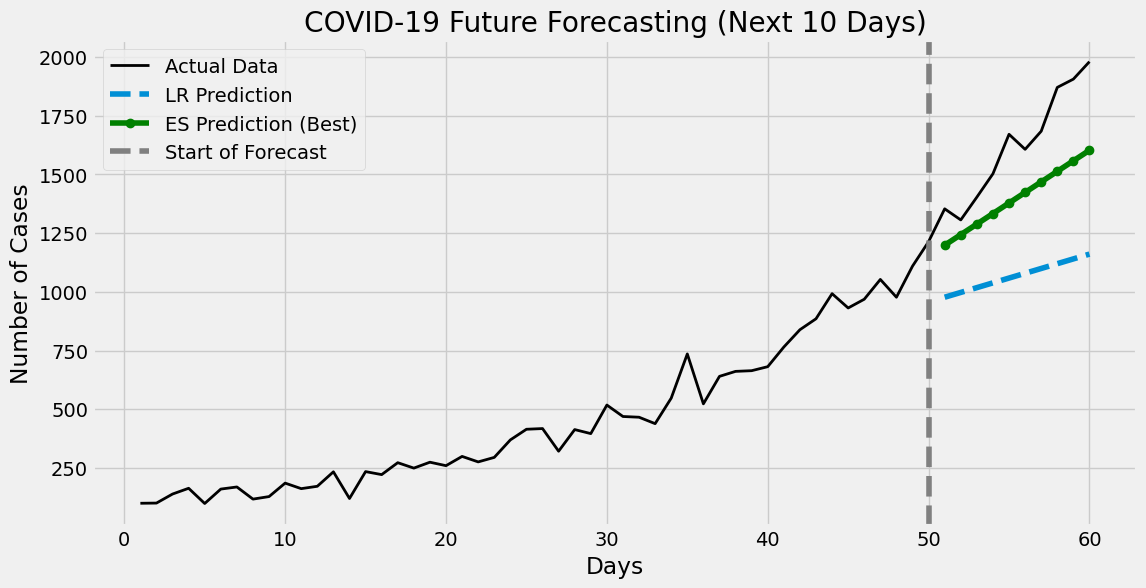

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# --- 1. SETTINGS ---
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# --- 2. DATA SIMULATION (Based on JHU csse_covid_19_time_series style) ---
# Simulating 60 days of COVID-19 data
days = np.array(range(1, 61)).reshape(-1, 1)
# Exponential growth simulation for cases
cases = 100 * np.exp(0.05 * days.flatten()) + np.random.normal(0, 50, 60)

# Train/Test Split (Predicting next 10 days as per paper)
train_days = days[:-10]
test_days = days[-10:]
train_cases = cases[:-10]
test_cases = cases[-10:]

# --- 3. MODEL IMPLEMENTATION ---

# A. Linear Regression (LR)
lr_model = LinearRegression()
lr_model.fit(train_days, train_cases)
lr_pred = lr_model.predict(test_days)

# B. LASSO Regression (L1 Regularization)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(train_days, train_cases)
lasso_pred = lasso_model.predict(test_days)

# C. Support Vector Machine (SVM) - Using RBF Kernel
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_model.fit(train_days, train_cases)
svm_pred = svm_model.predict(test_days)

# D. Exponential Smoothing (ES) - The top performer in the paper
es_model = ExponentialSmoothing(train_cases, trend='add', seasonal=None)
es_fit = es_model.fit()
es_pred = es_fit.forecast(10)

# --- 4. EVALUATION (MSE, MAE, R2 as per paper) ---
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

print("📊 Model Evaluation for Next 10 Days:")
evaluate(test_cases, lr_pred, "Linear Regression")
evaluate(test_cases, lasso_pred, "LASSO")
evaluate(test_cases, svm_pred, "SVM")
evaluate(test_cases, es_pred, "Exponential Smoothing")

# --- 5. VISUALIZATION ---
plt.figure(figsize=(12, 6))
plt.plot(days, cases, label='Actual Data', color='black', linewidth=2)
plt.plot(test_days, lr_pred, '--', label='LR Prediction')
plt.plot(test_days, es_pred, '-o', label='ES Prediction (Best)', color='green')
plt.axvline(x=50, color='gray', linestyle='--', label='Start of Forecast')
plt.title("COVID-19 Future Forecasting (Next 10 Days)")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()